<a href="https://colab.research.google.com/github/longddaays/sentiment-analysis/blob/main/BERT_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# all

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/BERT/SA')

Mounted at /content/drive/


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 13.7 MB/s 
     |████████████████████████████████| 596 kB 34.2 MB/s 
     |████████████████████████████████| 101 kB 11.3 MB/s 
     |████████████████████████████████| 6.6 MB 44.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install fairseq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.0 MB 11.1 MB/s 
     |████████████████████████████████| 92 kB 12.4 MB/s 
     |████████████████████████████████| 236 kB 56.5 MB/s 
     |████████████████████████████████| 123 kB 53.4 MB/s 
     |████████████████████████████████| 112 kB 58.9 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=a9a5883ab546e1d3866205cb808b13d4ca11d74758646d86111e95c552fd31ce
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime


In [ ]:
!pip install fastBPE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp37-cp37m-linux_x86_64.whl size=483892 sha256=856a5d6fa38046f804b224444018c24a40ba19772a8cb1c2fccb56f4e46f972d
  Stored in directory: /root/.cache/pip/wheels/bd/d4/0e/0d317a65f77d3f8049fedd8a2ee0519164cf3e6bd77ef886f1
Successfully built fastBPE


In [ ]:
pip install vncorenlp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 10.0 MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645951 sha256=cb5aeb6f628b31d2f93c8099673326ac3a7477a580890fcb320d8d71bf20b224
  Stored in directory: /root/.cache/pip/wheels/0c/d8/f2/d28d97379b4f6479bf51247c8dfd57fa00932fa7a74b6aab29
Successfully built vncorenlp


In [ ]:
# %mkdir -p vncorenlp/models/wordsegmenter

In [ ]:
# !wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
# !wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
# !wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr

In [ ]:
# !mv VnCoreNLP-1.1.1.jar vncorenlp/ 
# !mv vi-vocab vncorenlp/models/wordsegmenter/
# !mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

In [ ]:
# !wget https://public.vinai.io/PhoBERT_base_transformers.tar.gz
# !tar -xzvf PhoBERT_base_transformers.tar.gz

In [ ]:
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--bpe-codes', 
    default="/content/drive/MyDrive/BERT/SA/PhoBERT_base_transformers/bpe.codes",
    required=False,
    type=str,
    help='path to fastBPE BPE'
)
args, unknown = parser.parse_known_args()
bpe = fastBPE(args)

# Load the dictionary
vocab = Dictionary()
vocab.add_from_file("/content/drive/MyDrive/BERT/SA/PhoBERT_base_transformers/dict.txt")

2022-06-29 20:47:54 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


In [ ]:
bpe.encode('Hôm_nay trời nóng quá nên tôi ở nhà viết Viblo!')
# >>> Output: 'Hôm_nay trời nóng quá nên tôi ở nhà viết Vi@@ blo@@ !'

vocab.encode_line('<s> ' + 'Hôm_nay trời nóng quá nên tôi ở nhà viết Vi@@ blo@@ !' + ' </s>')

# >>> Output: tensor([0, 3791, 1027, 898, 204, 77, 70, 25, 69, 467, 3696, 16856, 381, 2, 2], dtype=torch.int32)

tensor([    0,  3791,  1027,   898,   204,    77,    70,    25,    69,   467,
         3696, 16856,   381,     2,     2], dtype=torch.int32)

In [ ]:
from sklearn.model_selection import train_test_split

train_sents, val_sents, train_labels, val_labels = train_test_split(train_text, train_labels, test_size=0.1)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN = 125

train_ids = []
for sent in train_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    train_ids.append(encoded_sent)

val_ids = []
for sent in val_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    val_ids.append(encoded_sent)
    
train_ids = pad_sequences(train_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
val_ids = pad_sequences(val_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")


In [ ]:
train_ids

array([[    0,    58,  7821, ...,     0,     0,     0],
       [    0,   154,    11, ...,     0,     0,     0],
       [    0,  4723,   258, ...,     0,     0,     0],
       ...,
       [    0,  1329,    17, ...,     0,     0,     0],
       [    0, 54848,     2, ...,     0,     0,     0],
       [    0,  9291,  1325, ...,     0,     0,     0]])

In [ ]:
train_masks = []
for sent in train_ids:
    mask = [int(token_id > 0) for token_id in sent]
    train_masks.append(mask)

val_masks = []
for sent in val_ids:
    mask = [int(token_id > 0) for token_id in sent]

    val_masks.append(mask)


In [ ]:
import numpy as np
# my_list = [2,4,6,8,10]
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
# printing my_array
train_masks = np.array(train_masks)
val_masks = np.array(val_masks)

In [ ]:
train_masks

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch

train_inputs = torch.tensor(train_ids)
val_inputs = torch.tensor(val_ids)
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)
train_masks = torch.tensor(train_masks)
val_masks = torch.tensor(val_masks)

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=32)

In [ ]:
train_inputs

tensor([[    0,    58,  7821,  ...,     0,     0,     0],
        [    0,   154,    11,  ...,     0,     0,     0],
        [    0,  4723,   258,  ...,     0,     0,     0],
        ...,
        [    0,  1329,    17,  ...,     0,     0,     0],
        [    0, 54848,     2,  ...,     0,     0,     0],
        [    0,  9291,  1325,  ...,     0,     0,     0]])

In [ ]:
val_inputs

tensor([[    0,    59,  1580,  ...,     0,     0,     0],
        [    0,  3421,  3852,  ...,     0,     0,     0],
        [    0,  5717,  8410,  ...,     0,     0,     0],
        ...,
        [    0, 11685,   957,  ...,     0,     0,     0],
        [    0,  1828,   482,  ...,     0,     0,     0],
        [    0,   574,   119,  ...,     0,     0,     0]])

In [ ]:
train_labels

tensor([2, 3, 4,  ..., 3, 4, 4])

In [ ]:
val_labels

tensor([3, 4, 2, 4, 4, 3, 3, 4, 0, 4, 3, 4, 0, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 1,
        4, 4, 4, 0, 4, 4, 3, 4, 2, 2, 4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4,
        3, 4, 4, 2, 4, 3, 1, 3, 4, 2, 4, 0, 3, 4, 4, 3, 4, 4, 4, 3, 1, 3, 4, 3,
        4, 4, 4, 4, 4, 2, 4, 2, 1, 3, 3, 4, 0, 4, 4, 4, 3, 2, 2, 4, 4, 4, 4, 3,
        4, 4, 4, 3, 4, 4, 2, 4, 2, 4, 4, 3, 3, 4, 4, 3, 2, 2, 4, 3, 3, 0, 4, 4,
        4, 2])

In [ ]:
train_masks

tensor([[0, 1, 1,  ..., 0, 0, 0],
        [0, 1, 1,  ..., 0, 0, 0],
        [0, 1, 1,  ..., 0, 0, 0],
        ...,
        [0, 1, 1,  ..., 0, 0, 0],
        [0, 1, 1,  ..., 0, 0, 0],
        [0, 1, 1,  ..., 0, 0, 0]])

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaConfig, AdamW

config = RobertaConfig.from_pretrained(
    "/content/drive/My Drive/BERT/SA/PhoBERT_base_transformers/config.json", from_tf=False, num_labels = 5, output_hidden_states=False,
)
BERT_SA = RobertaForSequenceClassification.from_pretrained(
    "/content/drive/My Drive/BERT/SA/PhoBERT_base_transformers/model.bin",
    config=config
)


You are using a model of type bert to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at /content/drive/My Drive/BERT/SA/PhoBERT_base_transformers/model.bin were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassificati

In [ ]:
BERT_SA.cuda()
print('Done')

Done


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    F1_score = f1_score(pred_flat, labels_flat, average='macro')
    
    return accuracy_score(pred_flat, labels_flat), F1_score

# tét

In [ ]:
train_labels

tensor([2, 3, 4,  ..., 3, 4, 4])



# train 

In [ ]:
import random
from tqdm import tqdm_notebook
device = 'cuda'
epochs = 10

param_optimizer = list(BERT_SA.named_parameters())

no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5, correct_bias=False)


for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    total_loss = 0
    BERT_SA.train()
    train_accuracy = 0
    nb_train_steps = 0
    train_f1 = 0
    a = 0
    for step, batch in tqdm_notebook(enumerate(train_dataloader)):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        # if a ==0:
        #   print(step)
        #   a = 1 -> all

        BERT_SA.zero_grad()
        outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask, 
            labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_train_accuracy, tmp_train_f1 = flat_accuracy(logits, label_ids)
        train_accuracy += tmp_train_accuracy
        train_f1 += tmp_train_f1
        nb_train_steps += 1
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(BERT_SA.parameters(), 1.0)
        optimizer.step()
        
    avg_train_loss = total_loss / len(train_dataloader)
    print(" Accuracy: {0:.4f}".format(train_accuracy/nb_train_steps))
    print(" F1 score: {0:.4f}".format(train_f1/nb_train_steps))
    print(" Average training loss: {0:.4f}".format(avg_train_loss))

======== Epoch 1 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.5482
 F1 score: 0.1903
 Average training loss: 1.2079
======== Epoch 2 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.5687
 F1 score: 0.2124
 Average training loss: 1.1366
======== Epoch 3 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.5848
 F1 score: 0.2680
 Average training loss: 1.0602
======== Epoch 4 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.6312
 F1 score: 0.3855
 Average training loss: 0.9555
======== Epoch 5 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.6955
 F1 score: 0.5025
 Average training loss: 0.8423
======== Epoch 6 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.7312
 F1 score: 0.5697
 Average training loss: 0.7544
======== Epoch 7 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.7607
 F1 score: 0.6104
 Average training loss: 0.6800
======== Epoch 8 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.7955
 F1 score: 0.6528
 Average training loss: 0.6179
======== Epoch 9 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.8036
 F1 score: 0.6796
 Average training loss: 0.5724
======== Epoch 10 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.8446
 F1 score: 0.7250
 Average training loss: 0.4933


# BERT Embedding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv

with open('/content/train_clean.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(" ", 1) for line in stripped if line)
    with open('/content/drive/MyDrive/Colab Notebooks/sentiment analysis/data/train_clean.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('label', 'combine'))
        writer.writerows(lines)

In [ ]:
import csv

with open('/content/crawl_lazada_clean1.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",", 1) for line in stripped if line)
    with open('/content/drive/MyDrive/Colab Notebooks/sentiment analysis/data/train_lazada.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('label', 'combine'))
        writer.writerows(lines)

In [ ]:
!pip install transformers
!pip install pyvi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers
from transformers import BertModel, BertTokenizer

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/sentiment analysis/data/tu_sua_tay_data_train.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/sentiment analysis/data/tu_sua_tay_data_test.csv'

In [ ]:
data_embedding = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sentiment analysis/data/train_clean.csv")
data_embedding.head()

,label,combine
0,4,bốn sao mẫu mã và chất lượng y hình
1,5,năm sao đẹp
2,5,năm sau very nice i love it
3,5,tot san pham giong hinh da dep
4,5,năm sao đẹp


In [ ]:
from google.colab import data_table
data_table.DataTable(data_embedding, include_index=False, num_rows_per_page=10)

,label,combine
0,4,bốn sao mẫu mã và chất lượng y hình
1,5,năm sao đẹp
2,5,năm sau very nice i love it
3,5,tot san pham giong hinh da dep
4,5,năm sao đẹp
...,...,...
493,5,chat luong tot
494,5,năm sao túi y hìnhđa mềm hợp túi tiền giao hà...
495,5,rẻ đẹp mình mua đúng hôm giảm còn 99k nay nhậ...
496,4,sản phẩm tốt sản phẩm tốt


# Preprocessing

In [ ]:
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 10.9 MB/s 
     |████████████████████████████████| 581 kB 40.5 MB/s 
     |████████████████████████████████| 235 kB 48.6 MB/s 


In [ ]:
import regex as re
import numpy as np
from underthesea import ner
from underthesea import word_tokenize

In [ ]:
regex_vn_lowcase = '[aăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵa-z]'
regex_vn_upcase = '[AĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴA-Z]'
regex_vn = '[AĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴA-Z]*[aăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵa-z]+[\-]*[0-9]*'
regex_vn_special_characters = "[^AĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴAĂÂÁẮẤÀẰẦẢẲẨÃẴẪẠẶẬĐEÊÉẾÈỀẺỂẼỄẸỆIÍÌỈĨỊOÔƠÓỐỚÒỒỜỎỔỞÕỖỠỌỘỢUƯÚỨÙỪỦỬŨỮỤỰYÝỲỶỸỴA-Zaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵaăâáắấàằầảẳẩãẵẫạặậđeêéếèềẻểẽễẹệiíìỉĩịoôơóốớòồờỏổởõỗỡọộợuưúứùừủửũữụựyýỳỷỹỵa-z\s\.\,\?]*"

In [ ]:
from tqdm import tqdm
tqdm.pandas()

def shuffle_data(data_frame):
  np.random.seed(40)
  data_frame = data_frame.sample(frac=1).reset_index(drop=True)
  return data_frame

# check entity name in a text, return a list of entity names (Np)
def check_entity_name(text):
    if text == text:
      list_segment = ner(text)
      res = [x[0] for x in list_segment if 'Np' in x]
      return res
    else: return []

# replace all entity names in a comment by "" <=> remove list of string entity names in a text => return a text without enity name
def replace_all(text, entity_names):
  if text == text:
    res = text
    for e in entity_names:
      res = res.replace(e, "")
    return res.replace("", "")
  else: return text

def preprocessing_str(s):
  s = re.sub("\https\:\/\/[^\s]*", "", s)
  s = re.sub("\(([^\s]*\s*)*\)", "", s)
  s = re.sub(regex_vn_special_characters, "", s)
  s = re.sub(r"([\s])\1+", r"\1", s)
  return s

def lower(s):
    s = s.lower()
    return s

def all_function(data_frame, col):
  data_frame[col] = data_frame[col].progress_apply(lambda x : preprocessing_str(x))
  data_frame[col] = data_frame[col].progress_apply(lambda x : replace_all(x, check_entity_name(x)))
  data_frame[col] = data_frame[col].progress_apply(lambda x : lower(x))
  return data_frame


In [ ]:
data_prep = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sentiment analysis/data/train_lazada.csv')
data_prep = shuffle_data(data_prep)
data_prep = all_function(data_prep, "combine")
data_prep.to_csv("/content/drive/MyDrive/Colab Notebooks/sentiment analysis/data/train_lazada_prep.csv")

100%|██████████| 980/980 [00:00<00:00, 194391.96it/s]


# Stop Words

In [ ]:
list_stop_words = open("/content/drive/MyDrive/Colab Notebooks/sentiment analysis/data/stop_word.txt", "r")
list_stop_words = list_stop_words.read().split("\n")

In [ ]:
def remove_stopwords(line):
  words = []
  for word in line.strip().split():
    if word not in list_stop_words:
      words.append(word)
  return ' '.join(words)

In [ ]:
data_prep['combine'] = data_prep['combine'].apply(lambda x: remove_stopwords(str(x)))
data_prep.head()

,label,combine
0,5,bao thất vọng .rất hài ủng hộ shop .
1,2,tui ổn mẫu đen giao màu bò đậm. hài chút nào. ...
2,5,"túi đẹp , dày dặn, da mềm, màu sắc hình, ưng s..."
3,5,đẹp màu hình
4,5,hàng ok mua mng


# Embedding

In [ ]:
# data_copy_ = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sentiment analysis/data/train_lazada_copy.csv")
# data_embedding_clean = data_prep.copy()
# data_embedding_clean.head()

In [ ]:
from pyvi.ViTokenizer import tokenize

data_embedding['combine'] = data_embedding['combine'].apply(lambda x: tokenize(str(x)))
data_embedding.head()

,label,combine
0,4,bốn sao mẫu_mã và chất_lượng y hình
1,5,năm sao đẹp
2,5,năm sau very nice i love it
3,5,tot san pham giong hinh da dep
4,5,năm sao đẹp


In [ ]:
data_embedding['label'].value_counts()

5    274
4    119
3     61
1     30
2     14
Name: label, dtype: int64

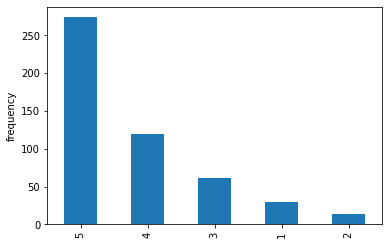

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
data_embedding['label'].value_counts().plot(ax = ax, kind = 'bar', ylabel = 'frequency')
plt.show()

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

PhobertTokenizer = AutoTokenizer.from_pretrained("VoVanPhuc/sup-SimCSE-VietNamese-phobert-base")
model = AutoModel.from_pretrained("VoVanPhuc/sup-SimCSE-VietNamese-phobert-base")


Downloading:   0%|          | 0.00/270 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/731 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/874k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/517M [00:00<?, ?B/s]

Some weights of the model checkpoint at VoVanPhuc/sup-SimCSE-VietNamese-phobert-base were not used when initializing RobertaModel: ['mlp.dense.bias', 'mlp.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def extract_features(s):
  vector = ""
  inputs = PhobertTokenizer(s, padding=True, truncation=True, return_tensors="pt")
  with torch.no_grad():
      doc = model(**inputs, output_hidden_states=True, return_dict=True).pooler_output
  return doc[0].numpy()
  
def convert_to_array(data_frame, col):
  return np.array(data_frame[col].tolist())

from tqdm import tqdm
tqdm.pandas()

def vector_column(data_frame, col1, col2):
  data_frame[col2] = data_frame[col1].progress_apply(lambda x: np.array(extract_features(x))) 
  return data_frame

In [ ]:
data_embedding_ = vector_column(data_embedding, 'combine', 'vector')

100%|██████████| 498/498 [00:56<00:00,  8.86it/s]


In [ ]:
X_data = convert_to_array(data_embedding_, 'vector')
np.save('/content/drive/MyDrive/Colab Notebooks/sentiment analysis/data/phobert_embedding_training_clean.npy', X_data, allow_pickle=True)

In [ ]:
X_data = convert_to_array(data_embedding_, 'vector')

# Machine Learning

In [ ]:
X_data = np.load('/content/drive/MyDrive/Colab Notebooks/sentiment analysis/data/phobert_embedding_training_clean.npy', allow_pickle=True)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_embedding_['label'] = le.fit_transform(data_embedding_['label'].astype(str))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data, data_embedding_['label'], test_size=0.2, shuffle=True) 

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(X_data)
print(kf)
KFold(n_splits=5, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf.split(X_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_data[train_index], X_data[test_index]

TRAIN: [249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374
 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392
 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410
 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428
 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446
 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464
 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482
 483 484 485 486 487 488 489 490 491 492 493

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(decision_function_shape = 'ovo', verbose=10)
svc_model.fit(x_train, y_train)

y_predict = svc_model.predict(x_test)

print(classification_report(y_test, y_predict, labels= [0,1,2,3,4], digits = 4))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

lr_model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr_model.fit(x_train, y_train)

y_predict = lr_model.predict(x_test)

print(classification_report(y_test, y_predict, labels= [0,1,2,3,4], digits = 4))

              precision    recall  f1-score   support

           0     0.8333    0.7143    0.7692         7
           1     0.0000    0.0000    0.0000         2
           2     0.8333    0.4167    0.5556        12
           3     0.4348    0.5000    0.4651        20
           4     0.7812    0.8475    0.8130        59

    accuracy                         0.7000       100
   macro avg     0.5765    0.4957    0.5206       100
weighted avg     0.7062    0.7000    0.6932       100



/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [ ]:
from sklearn.svm import SVC

svc_model = SVC(decision_function_shape = 'ovo', verbose=10, class_weight = {0:5, 1:0, 2:1.5, 3:1.5, 4:5})
svc_model.fit(x_train, y_train)

y_predict = svc_model.predict(x_test)

print(classification_report(y_test, y_predict, labels= [0,1,2,3,4], digits = 4))

[LibSVM]              precision    recall  f1-score   support

           0     0.6667    0.5714    0.6154         7
           1     0.0000    0.0000    0.0000         2
           2     1.0000    0.3333    0.5000        12
           3     0.8000    0.4000    0.5333        20
           4     0.7250    0.9831    0.8345        59

    accuracy                         0.7400       100
   macro avg     0.6383    0.4576    0.4967       100
weighted avg     0.7544    0.7400    0.7021       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=None, random_state=0)
rfc.fit(x_train, y_train)

y_predict = rfc.predict(x_test)

print(classification_report(y_test, y_predict, labels= [0,1,2,3,4], digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.2000    0.3333         5
           1     0.0000    0.0000    0.0000         4
           2     0.7500    0.2500    0.3750        12
           3     0.4286    0.1667    0.2400        18
           4     0.6818    0.9836    0.8054        61

    accuracy                         0.6700       100
   macro avg     0.5721    0.3201    0.3507       100
weighted avg     0.6331    0.6700    0.5961       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test)

params = {
    'max_depth': 100,
    'objective': 'multi:softmax',  
    'num_class': 5,
    'n_gpus': 0,
    'learning_rate': 0.5,
    'n_estimators': 100,
    'eta':0.1,
    'subsample':0.8
}
# num_round = 2

# cv_analysis = xgb.cv(params, dtrain, num_round, nfold=5, seed=0)

bst = xgb.train(params, dtrain)

y_predict = bst.predict(dtest)

print(classification_report(y_test, y_predict, labels= [0,1,2,3,4]))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.00      0.00      0.00         2
           2       0.67      0.33      0.44        12
           3       0.53      0.45      0.49        20
           4       0.76      0.90      0.82        59

    accuracy                           0.71       100
   macro avg       0.53      0.48      0.49       100
weighted avg       0.68      0.71      0.69       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
xgb_cl=xgb.XGBClassifier(colsample_bytree=0.8, learning_rate=0.4, max_depth=4)
cvs=cross_val_score(xgb_cl,x_train,y_train,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb_cl,x_test,y_test,cv=10)
conf_mat=confusion_matrix(y_pred,y_test)
conf_mat

cross_val_scores=   0.6156410256410256


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


NameError: ignored